<a href="https://colab.research.google.com/github/chavgova/My-AI/blob/master/emotion_recognition_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT

In [1]:
#this is the copy of another projecct and ill make changes to see how i can make it better 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os

In [2]:
from google.colab import drive
import os

path = '/content/drive/My Drive/My_AI/RawData'

mylist = []

#for root, directories, files in os.walk(path, topdown=False):
#	for name in files:
#			#print(os.path.join(root, name))
#			mylist.append(name)

mylist = os.listdir(path)

print(mylist)	



['03-01-07-02-01-02-15.wav', '03-01-08-01-02-01-15.wav', '03-01-03-01-02-01-16.wav', '03-01-08-02-01-02-15.wav', '03-01-02-01-02-01-16.wav', '03-01-02-01-02-02-16.wav', '03-01-07-02-02-01-15.wav', '03-01-07-01-02-02-15.wav', '03-01-08-01-01-02-15.wav', '03-01-03-01-01-02-16.wav', '03-01-03-01-01-01-16.wav', '03-01-02-02-01-02-16.wav', '03-01-08-01-02-02-15.wav', '03-01-02-02-02-02-16.wav', '03-01-08-02-01-01-15.wav', '03-01-01-01-02-01-16.wav', '03-01-07-02-01-01-15.wav', '03-01-02-02-02-01-16.wav', '03-01-01-01-01-01-16.wav', '03-01-08-02-02-02-15.wav', '03-01-02-02-01-01-16.wav', '03-01-06-02-01-02-15.wav', '03-01-08-02-02-01-15.wav', '03-01-01-01-01-02-16.wav', '03-01-01-01-02-02-16.wav', '03-01-06-02-02-02-15.wav', '03-01-08-01-01-01-15.wav', '03-01-02-01-01-01-16.wav', '03-01-07-01-01-01-15.wav', '03-01-07-02-02-02-15.wav', '03-01-06-02-02-01-15.wav', '03-01-07-01-02-01-15.wav', '03-01-05-02-02-01-16.wav', '03-01-04-01-01-02-16.wav', '03-01-06-01-01-02-16.wav', '03-01-05-02-01-01-

In [3]:
print(mylist[50])

03-01-05-02-02-02-16.wav


In [4]:
print(mylist[18][6:-16])

01


Plotting the audio file's waveform and its spectrogram

In [5]:
data, sampling_rate = librosa.load('/content/drive/My Drive/My_AI/RawData/03-01-08-01-01-02-01.wav')
# play
# this way the sample rate is by defaut 22050
# https://librosa.org/doc/latest/generated/librosa.load.html?highlight=load#librosa.load

Populating the interactive namespace from numpy and matplotlib


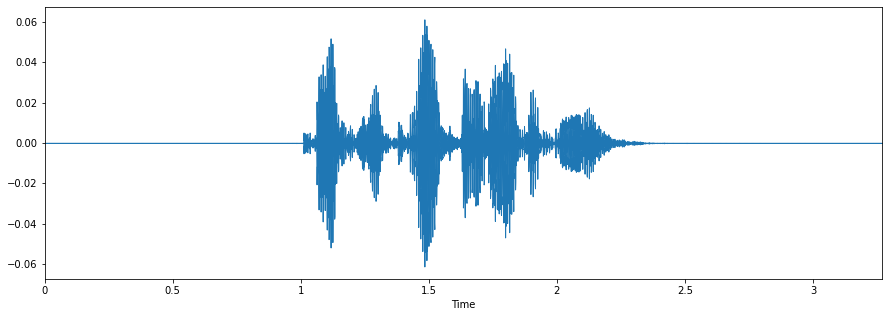

In [6]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

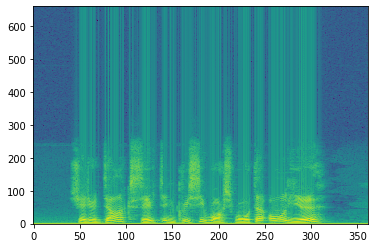

In [7]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('/content/drive/My Drive/My_AI/RawData/a01.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

LABLES

In [8]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')

In [9]:
labels = pd.DataFrame(feeling_list)
labels[:10]      #print

,0
0,female_happy
1,female_calm
2,female_calm
3,female_happy
4,female_happy
5,female_calm
6,female_calm
7,female_calm
8,female_calm
9,male_fearful


Getting the features of audio files using librosa

In [10]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('/content/drive/My Drive/My_AI/RawData/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]

# ADD OTHER FEATURES - PITCH, FORMANTS

        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

df[:5]    #print 


,feature
0,"[-52.999341362823046, -52.908320396816706, -52..."
1,"[-63.91951960258528, -63.91951960258528, -63.9..."
2,"[-63.36493547300945, -63.36493547300945, -63.3..."
3,"[-56.14398257995732, -56.11529498327217, -56.1..."
4,"[-57.25403193996721, -57.25403193996721, -57.2..."


In [11]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [12]:
newdf = pd.concat([df3,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})
rnewdf[:5]     #print

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
0,-52.999341,-52.908320,-52.419474,-52.407041,-52.703504,-52.703729,-52.881352,-53.652672,-53.442130,-53.399995,-52.936130,-52.855352,-53.408273,-54.230096,-53.775523,-53.110343,-53.212579,-53.110340,-53.452509,-54.026637,-53.866342,-53.746744,-53.631111,-53.161886,-52.594593,-53.175608,-53.722765,-53.990360,-54.388840,-54.382748,-54.141345,-53.739298,-52.810703,-52.015617,-52.651392,-53.509596,-54.068613,-54.578529,-54.050684,-53.875475,...,-33.420267,-34.627796,-35.997446,-36.588545,-35.496607,-34.631422,-35.986732,-37.617723,-35.908234,-35.112555,-36.068647,-34.734479,-34.046684,-34.405168,-35.161953,-38.732775,-39.992461,-37.849774,-38.130163,-40.331110,-41.142678,-41.586834,-42.434086,-42.162214,-42.145577,-45.302447,-46.008932,-46.429706,-45.960514,-46.344986,-48.523217,-51.100824,-53.086382,-50.750435,-51.106344,-53.263277,-53.704513,-53.492560,-53.001706,female_happy
1,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.919520,-63.901882,-62.288715,-61.712327,-60.431450,-56.765962,...,-38.801494,-38.492039,-38.730069,-39.534293,-38.661109,-38.350979,-38.715371,-37.983474,-37.336211,-37.203580,-37.907172,-36.649397,-36.871879,-35.431115,-34.401268,-33.998570,-35.062288,-34.083343,-36.426970,-38.513892,-38.064529,-38.437561,-39.206041,-41.455200,-41.214819,-43.477052,-43.051846,-44.180071,-47.012434,-47.283102,-48.047974,-47.247027,-48.581342,-49.657013,-51.463253,-51.951028,-50.134878,-50.420952,-51.600731,female_calm
2,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.583327,-62.683095,-62.494577,-63.381204,-63.365763,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.364935,-63.203635,-63.260253,-62.876319,-62.749284,-59.086329,-58.419650,-61.535701,...,-34.928498,-35.845744,-34.971355,-33.286401,-32.954128,-33.684865,-32.192810,-33.138028,-33.827105,-34.441265,-36.179391,-35.844999,-35.889664,-35.536563,-34.951825,-36.073192,-39.185069,-40.743475,-41.356977,-42.530639,-44.670817,-45.173711,-44.261108,-45.236088,-48.140732,-53.588053,-54.788834,-55.691175,-52.299672,-52.742191,-55.843555,-54.328166,-53.345154,-53.183449,-56.201401,-57.590060,-57.458604,-56.800012,-56.475477,female_calm
3,-56.143983,-56.115295,-56.115295,-56.115295,-56.115295,-56.115295,-56.115295,-56.115295,-56.115295,-56.115295,-56.163165,-56.179856,-56.120164,-56.178848,-56.305101,-56.384139,-56.199084,-56.208452,-56.254061,-56.216569,-56.215062,-56.203913,-56.162063,-56.115295,-56.115295,-56.117504,-56.115295,-56.115295,-56.115295,-56.115295,-56.115295,-56.115295,-56.115295,-56.115295,-55.150113,-53.936188,-52.984394,-53.924131,-55.378061,-56.115295,...,-29.669106,-30.523018,-31.069077,-30.363492,-29.693289,-29.795583,-29.867056,-30.969751,-30.310060,-30.306662,-31.696192,-34.665891,-38.241359,-38.504991,-38.249407,-38.021625,-39.264346,-40.542200,-39.864580,-40.222437,-42.379277,-44.583716,-43.869432,-43.191553,-42.855315,-45.248310,-48.522327,-48.409706,-47.809957,-47.726656,-49.816833,-53.152288,-50.878348,-51.290188,-51.298487,-53.192987,-52.801656,-50.226913,-51.494558,female_happy
4,-57.254032,-57.254032,-57.254032,-57.254032,-57.254032,-57.254032,-57.254032,-57.254032,-57.254032,-57.254032,-57.254032,-57.254032,-57.254032,-57.254032,-57.254032,-57.254032

In [13]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]      #print 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
529,-62.430162,-61.890209,-59.801767,-60.353930,-60.058773,-60.072021,-60.970773,-62.690823,-62.405864,-62.465799,-60.181872,-59.487587,-60.332995,-58.663994,-58.632603,-61.891114,-59.121062,-58.853745,-62.639727,-61.797875,-61.536484,-62.697107,-58.189931,-57.195067,-59.064499,-63.969559,-63.797363,-63.969559,-63.969559,-63.969559,-63.969559,-63.969559,-63.969559,-63.056155,-60.925086,-56.454324,-52.996445,-49.994400,-48.620270,-47.987340,...,-53.027077,-56.157356,-56.702060,-57.743527,-60.227991,-58.063233,-55.036351,-54.704104,-55.098416,-54.448514,-52.996388,-52.808638,-53.063056,-52.064472,-51.357534,-52.355052,-54.090640,-55.378147,-54.768278,-55.434762,-56.469791,-54.018226,-53.840482,-59.012902,-57.123137,-54.722071,-56.132271,-59.357093,-57.118004,-56.599970,-54.385944,-55.304028,-58.207417,-58.249243,-58.344151,-57.103423,-57.147382,-59.231643,-63.969559,male_happy
634,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-66.455295,-65.457486,-64.746725,-60.057897,-60.372184,-63.414644,-62.500543,-57.242746,-59.550164,-63.708345,-65.370915,-65.653329,-61.937004,-61.413380,-65.725079,-68.049082,-68.049082,-68.049082,-64.981424,-64.393037,-61.055654,-59.256620,-60.308282,-58.513296,...,-59.186635,-61.982069,-60.497839,-61.920777,-60.137364,-59.768452,-56.758206,-57.317191,-57.625242,-63.207113,-67.604816,-67.733064,-64.172364,-63.752224,-63.282728,-59.456975,-60.791572,-64.993870,-65.131699,-63.193713,-63.951018,-68.049082,-67.975376,-65.225152,-62.818712,-67.005626,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,-68.049082,male_sad
645,-66.348220,-66.348220,-66.348220,-66.348220,-66.348220,-62.797142,-65.721075,-66.348220,-66.348220,-66.348220,-66.348220,-66.348220,-66.348220,-66.348220,-66.348220,-66.348220,-66.348220,-66.348220,-66.348220,-66.348220,-66.348220,-66.348220,-66.348220,-65.539103,-65.235397,-65.960770,-65.866043,-66.292445,-66.344963,-66.308412,-58.316546,-53.019665,-55.860587,-63.635885,-64.276157,-61.508929,-64.663005,-66.348220,-66.343789,-65.426646,...,-29.248771,-29.981419,-30.773453,-30.184735,-31.098431,-29.863031,-30.304493,-28.938331,-29.702402,-29.419272,-29.009480,-26.874819,-28.122054,-29.815116,-29.631657,-29.067308,-29.058060,-29.088444,-30.343660,-33.618891,-36.746572,-37.047675,-36.307505,-38.654810,-40.946455,-42.198892,-44.470390,-45.058984,-47.622564,-50.558052,-52.630403,-49.383379,-49.429265,-52.419689,-53.660921,-53.482833,-52.205515,-53.831723,-54.519055,male_sad
691,-63.790468,-63.947461,-63.355617,-63.286238,-63.246244,-62.802944,-62.743816,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.954199,-62.956674,-62.803770,-62.749044,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.665564,-62.490947,-62.029841,...,-33.883773,-33.165072,-35.201878,-33.580911,-33.189287,-35.553865,-36.238903,-35.487174,-37.176350,-39.830265,-41.932484,-41.495398,-41.718686,-44.099620,-43.435293,-45.450689,-47.429433,-44.461180,-45.484678,-48.075049,-51.851729,-52.768063,-51.406714,-50.635566,-54.184932,-54.690261,-49.428429,-49.046749,-50.993589,-51.763688,-53.914061,-52.145923,-52.200075,-52.263312,-53.177225,-53.587504,-54.778593,-55.114742,-54.505995,female_sad
689,-58.684684,-58.684684,-58.684684,-58.684684,-58.684684,-58.685153,-58.866836,-58.796649,-59.059703,-59.157936,-58.780046,-58.539150,-57.205232,-55.893776,-55.620700,-56.062566

In [14]:
rnewdf=rnewdf.fillna(0)


Dividing the data into test and train

In [15]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [16]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,0
110,-53.422848,-53.381505,-54.223379,-55.122880,-55.148426,-54.886428,-54.639750,-55.036372,-55.148934,-55.148934,-54.655025,-54.793118,-54.899966,-55.148934,-55.131733,-53.640421,-52.116469,-51.006692,-49.468811,-49.740728,-50.607159,-50.097726,-51.265521,-50.600490,-51.187961,-54.213038,-51.279451,-51.205987,-51.565586,-51.669580,-53.426971,-51.941008,-52.263416,-54.134872,-50.268797,-49.539004,-49.613959,-47.492633,-44.123839,-36.635610,...,-55.023599,-52.988172,-51.993849,-51.832476,-52.859840,-54.169953,-54.938532,-54.871215,-54.986083,-55.035687,-55.184636,-54.994601,-51.575466,-50.099518,-50.640825,-54.144042,-55.114043,-54.383730,-55.148934,-55.148934,-55.148934,-55.148934,-55.148934,-55.148934,-54.785624,-55.148934,-55.148934,-55.148934,-55.148934,-55.148934,-55.148934,-55.148934,-55.148934,-55.148934,-55.148934,-55.148934,-55.148934,-55.148934,-55.148934,male_angry
433,-43.144329,-43.240801,-43.574076,-43.559701,-43.377748,-42.510557,-42.398955,-41.682377,-41.117344,-41.384153,-41.985783,-42.839486,-43.617939,-42.511885,-42.666992,-43.360843,-42.456122,-41.181992,-41.969499,-43.028039,-43.617939,-43.598927,-42.677974,-42.285760,-43.228772,-42.078886,-41.259903,-40.338985,-41.016623,-41.341861,-42.691850,-43.241201,-43.532474,-43.023459,-42.764620,-42.563435,-43.135117,-42.324993,-39.943106,-39.966565,...,-19.523002,-22.587701,-22.855999,-23.390642,-21.037020,-13.742649,-14.054808,-19.224239,-22.120655,-22.401686,-22.124372,-23.373381,-24.011009,-23.875986,-24.336292,-23.907699,-23.167170,-22.210188,-22.352408,-22.080888,-21.416187,-20.946427,-21.244167,-22.830986,-25.277933,-24.364983,-26.385047,-28.284102,-27.711779,-29.616772,-32.683877,-33.158848,-33.733819,-35.125349,-37.479664,-36.947753,-36.216891,-34.943893,-37.373885,female_angry
212,-48.516005,-43.964135,-44.182476,-46.691646,-47.104734,-48.033919,-50.963956,-52.300334,-53.289898,-52.496014,-51.815972,-52.129482,-51.032821,-47.940371,-47.466497,-48.829262,-48.021324,-47.499577,-45.798062,-43.395124,-43.068064,-44.253819,-43.338506,-42.341377,-41.802451,-41.595494,-42.980783,-43.091988,-41.719461,-43.517581,-45.905574,-47.085249,-48.595847,-50.637332,-51.819550,-51.860259,-51.889753,-52.757814,-50.849565,-48.546761,...,-37.907538,-37.946667,-37.173897,-35.152628,-33.604936,-34.366667,-34.684343,-33.386857,-31.587829,-32.227564,-32.308373,-31.081200,-30.122561,-30.127100,-32.572644,-33.848440,-35.166631,-33.011406,-32.049188,-31.664052,-32.886134,-34.267726,-35.702658,-37.824394,-38.340238,-40.427157,-40.908366,-40.265340,-41.328367,-42.670911,-43.812809,-43.561325,-43.571277,-43.693620,-44.293861,-45.482508,-46.309098,-46.455313,-47.690847,female_happy
711,-55.349543,-55.585305,-56.931356,-56.681721,-56.784476,-55.854030,-55.723222,-56.154396,-55.498716,-53.932386,-54.442174,-54.940537,-55.654068,-55.587275,-55.436378,-54.709421,-54.013558,-54.589273,-54.905116,-55.497659,-56.958957,-58.114366,-58.268100,-58.265289,-58.265289,-58.265289,-58.265289,-58.265289,-58.265289,-58.265289,-58.265289,-58.265289,-58.265289,-58.265289,-58.265289,-58.265289,-58.265289,-58.265289,-58.265289,-58.265289,...,-42.748899,-42.775348,-43.397309,-44.298867,-42.203694,-42.019815,-42.264510,-42.227824,-40.721545,-40.430017,-39.891986,-40.834125,-40.877497,-41.319213,-41.775979,-43.764212,-44.817684,-46.583281,-46.549568,-46.247159,-47.551424,-49.467862,-50.431505,-50.533499,-53.308044,-55.105863,-51.339344,-53.180187,-58.334618,-58.246852,-57.985374,-58.166031,-58.036148,-55.960418,-56.344690,-57.951899,-54.570671,-51.357930,-52.141321,female_fearful
844,-62.619019,-61.001280,-60.393424,-60.479328,-61.317270,-64.020122,-60.963452,-60.684991,-62.826767,-62.177266,-60.536808,-60.991534,-63.168409,-63.964409,-63.25711

In [17]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]

In [18]:
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [19]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [21]:
X_train.shape

(720, 216)

Changing dimension for CNN model

In [22]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [23]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(10))
model.add(Activation('softmax'))


opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          1536      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_1 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 27, 128)           8

In [25]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

Removed the whole training part for avoiding unnecessary long epochs list

In [26]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=30, validation_data=(x_testcnn, y_test))

Epoch 1/30
23/23 [==============================] - 5s 201ms/step - loss: 2.4332 - accuracy: 0.1181 - val_loss: 2.3300 - val_accuracy: 0.0760
Epoch 2/30
23/23 [==============================] - 4s 195ms/step - loss: 2.2893 - accuracy: 0.1319 - val_loss: 2.2929 - val_accuracy: 0.0877
Epoch 3/30
23/23 [==============================] - 4s 192ms/step - loss: 2.2613 - accuracy: 0.1250 - val_loss: 2.2610 - val_accuracy: 0.1696
Epoch 4/30
23/23 [==============================] - 4s 194ms/step - loss: 2.2402 - accuracy: 0.1514 - val_loss: 2.2499 - val_accuracy: 0.1520
Epoch 5/30
23/23 [==============================] - 4s 192ms/step - loss: 2.2211 - accuracy: 0.1764 - val_loss: 2.2315 - val_accuracy: 0.1754
Epoch 6/30
23/23 [==============================] - 4s 193ms/step - loss: 2.2040 - accuracy: 0.1681 - val_loss: 2.2179 - val_accuracy: 0.1930
Epoch 7/30
23/23 [==============================] - 4s 194ms/step - loss: 2.1897 - accuracy: 0.2042 - val_loss: 2.2005 - val_accuracy: 0.1696
Epoch 

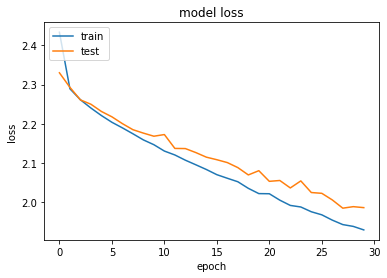

In [27]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()